# Computational Social Science Project #3 

*Group number:* 8

*Group members:* Christina Misunas, Madeline Adee, Alex Huang

*Semester:* Fall 2022

## 1. Introduction

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelBinarizer

In [93]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)
# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("Chicago Inspections 2014.csv", 
                                      low_memory=False)

In [94]:
chicago_inspections_2011_to_2013.shape

(17677, 75)

In [95]:
chicago_inspections_2014.shape

(4623, 74)

In [96]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [97]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [98]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [99]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True) 


### Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

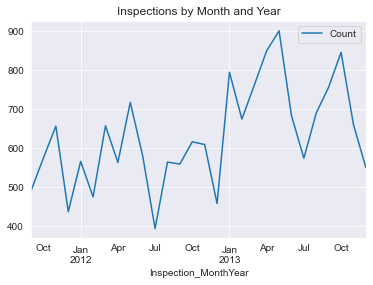

In [100]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 

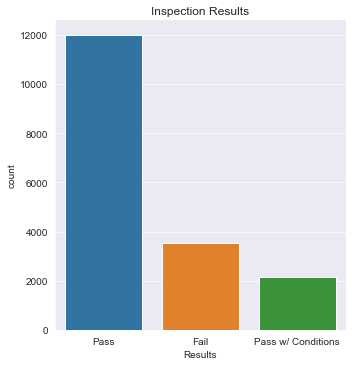

In [25]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

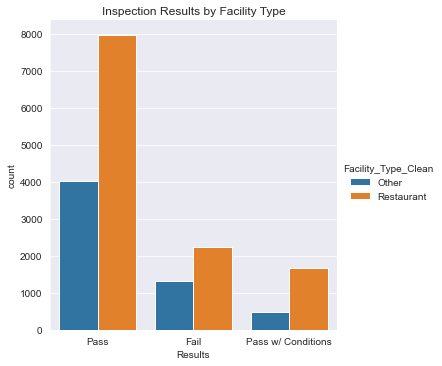

In [26]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## 2. Preprocess Data

In [101]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

chicago_inspections_2011_to_2013.shape

(15311, 39)

In [102]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])

In [70]:
X.shape

(15311, 38)

In [103]:
X = pd.get_dummies(X)

In [72]:
X.shape

(15311, 2042)

In [52]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [47]:
X.shape

(15311, 2042)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_standardized = scaler.transform(X)

## 3. Fit Models

### 3.1 Data splitting

We split the data into training and validation sets. 

In [31]:
# Set seed
np.random.seed(10)

# split into test and validate
X_train, X_validate, y_train, y_validate = train_test_split(X_standardized, y, train_size = .80, test_size=0.20,stratify=y)

### 3.2 Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

**The three models we chose for this problem are: 1) logistic regression, 2) support vecor machines, and 3) decision trees.** 

We chose the **logistic model** because it is relativeley simple and interpretable, and works well for a binary outcome. Logistic regression also gives us easily interpretable coefficients that show the importance of different features. However a potential issue with this model is that liearity is assumed and other patterns in the data may not be captured, and that it requires the researcher to make the assumption that the variables are not collinear. 

We chose the **support vector machine (SVM)** because it is robust to outliers and in this case we don't necessarily need to directly measure the association between each feature and the dataset (a limitation of SVM). However an issue for SVM is that the hyperparameter tuning is time intensive, particularly when specifying a linear kernel. 

We chose **decision tree** because they are good at picking up non-linear and complex patterns in the data. Decision trees employ information gain to determine which characteristic to divide their nodes on in order to better predict the target variable with each split and when to stop splitting the tree. Decision trees need less effort to prepare data than other algorithms. A decision tree model is also easy to be interpreted, and the variable importance can be easily determined. An issue with this model is a potential for high variance and over-fitting. 


#### Model 1: Logistic Regression

In [109]:
# create a model
logit_reg = LogisticRegression(max_iter=10000) 
# fit the model
logit_model = logit_reg.fit(X_train, y_train.ravel())
y_pred = logit_model.predict(X_validate)

In [110]:
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

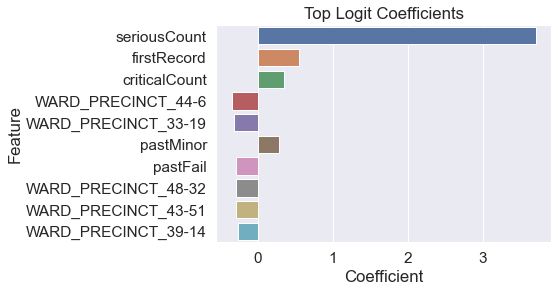

In [111]:
#Then, we plot the 10 coefficients with the largest absolute value.
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

In [112]:
# model validation metrics prior to tuning
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2445
           1       0.81      0.72      0.76       618

    accuracy                           0.91      3063
   macro avg       0.87      0.84      0.85      3063
weighted avg       0.91      0.91      0.91      3063



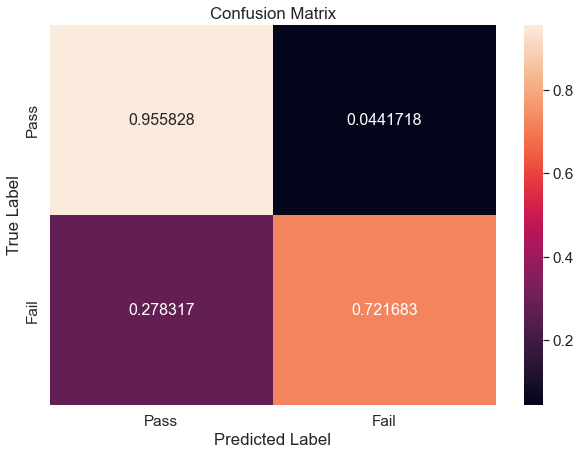

In [67]:
#Create a confusion matrix to visualize how well you did with your predictions
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")
df_cm = pd.DataFrame(cf_matrix)
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Model 1: Hyperparameter Tuning

In [73]:
# FOR LOGISTIC REGRESSION - USING SCORING TO GET RECALL SCORE
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.1, 1, .1),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}
logit_grid = GridSearchCV(logit_model, param_grid, cv=3, scoring='f1', n_jobs =4)

In [74]:
logit_grid.fit(X_train, np.ravel(y_train))
best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])

In [75]:
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [76]:
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)
print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

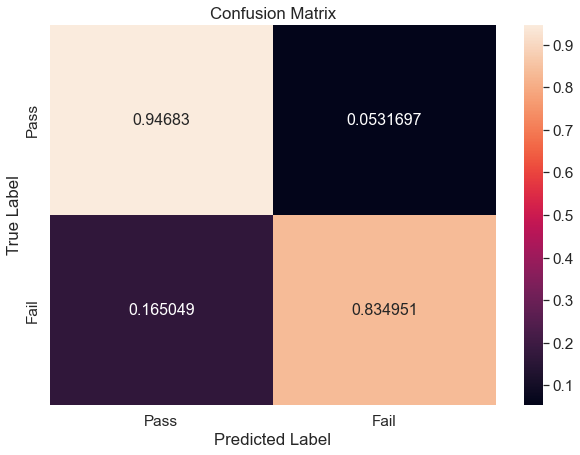

In [92]:
cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")
df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))
df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The top left quadrant in this case would be true negatives, the top right false positives, the bottom left false negatives, the bottom right true positives. In this case, we do a really good job with true negatives (.95), slightly less well with true positives (.83). We can also calculate the accuracy, precision, recall, and f1 score to better assess the model. For this model we calculated the way that we learned in class, to compare to the output of the classification_report. For the other models, we use classification_report only for conciseness.

In [85]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in range(len(best_logit_pred)): 
    if y_validate[i]==best_logit_pred[i]==1:
        TP += 1
    if best_logit_pred[i]==1 and y_validate[i]==0:
        FP += 1
    if y_validate[i]==best_logit_pred[i]==0:
        TN += 1
    if best_logit_pred[i]==0 and best_logit_pred[i]!=y_validate[i]:
        FN += 1

In [86]:
#ACCURACY
accuracy = (TP + TN)/(TP + TN + FP + FN)
print("Accuracy is", accuracy)

Accuracy is 0.9242572641201436


In [87]:
# PRECISION
precision = TP/(TP + FP)
print("Precision is", precision)

Precision is 0.7987616099071208


In [88]:
# RECALL
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.8349514563106796


In [89]:
#The precision-recall tradeoff can be managed in a few different ways. One popular metric is the F1 score. 
f1 = 2 * (precision * recall)/(precision + recall)
print("F1 Score is", f1)

F1 Score is 0.8164556962025317


We can also double check these values with the classification_report function. Here we can see that the values calculated above match.

In [113]:
#checking
from sklearn.metrics import classification_report
# model validation metrics after tuning
print(classification_report(y_validate, best_logit_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2445
           1       0.80      0.83      0.82       618

    accuracy                           0.92      3063
   macro avg       0.88      0.89      0.88      3063
weighted avg       0.93      0.92      0.92      3063



### Model 2: Support Vector Machines

#### Basic Model

In [14]:
# create a model
svm = SVC()

# fit the model 
svm_model = svm.fit(X_train, y_train.flatten())
y_pred2 = svm_model.predict(X_validate)

In [15]:
from sklearn.metrics import classification_report

# model validation metrics prior to tuning
print(classification_report(y_validate, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2445
           1       0.77      0.47      0.58       618

    accuracy                           0.86      3063
   macro avg       0.82      0.72      0.75      3063
weighted avg       0.86      0.86      0.85      3063



#### Model 2: Hyperparameter tuning

In [16]:
# defining parameter range
param_grid_svm = {'C': [0.1, 1], 
                  'gamma': [1, 0.1, 0.01, 0.001], 
                  'kernel': ['linear']} 
 # switched to linear so we can get coefficients for plot (based on email from Tom)

svm_grid = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 2)

In [17]:
svm_grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  17.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  17.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  17.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  17.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  16.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  16.4s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  17.3s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  16.2s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  17.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=  16.9s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=  16.3s
[CV] END ...................C=0.1, gamma=0.01, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=2)

In [20]:
print(svm_grid.best_params_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [22]:
# print how our model looks after hyper-parameter tuning
print(svm_grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [106]:
best_svm_prediction = svm_grid.best_estimator_.predict(X_validate)

# model validation metrics after tuning
print(classification_report(y_validate, best_svm_prediction ))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2445
           1       0.77      0.86      0.81       618

    accuracy                           0.92      3063
   macro avg       0.87      0.90      0.88      3063
weighted avg       0.93      0.92      0.92      3063



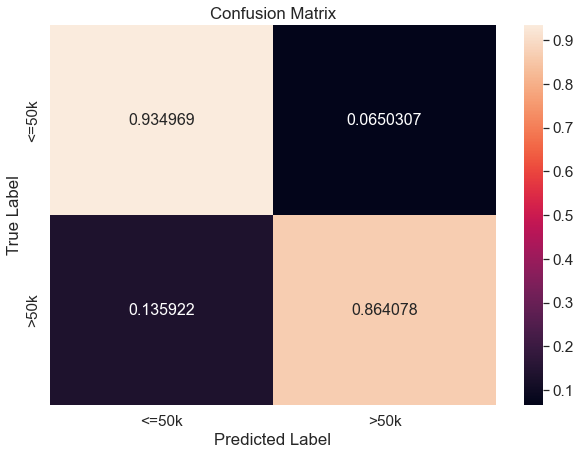

In [26]:
cf_matrix_svm = confusion_matrix(y_validate, best_svm_prediction, normalize = "true")

df_cm_svm = pd.DataFrame(cf_matrix_svm, range(2),
                  range(2))

df_cm_svm = df_cm_svm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm_svm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm_svm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model 3: Decision Trees

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, tree
from scipy.stats import randint as sp_randint
from sklearn.metrics import classification_report

In [95]:
# model performance before hyperparameter tuning

clff = DecisionTreeClassifier(max_depth=3)
clff = clff.fit(X_train, y_train)
y_pred = clff.predict(X_validate)
# print prediction results
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2445
           1       0.75      0.96      0.84       618

    accuracy                           0.93      3063
   macro avg       0.87      0.94      0.89      3063
weighted avg       0.94      0.93      0.93      3063



In [33]:
from sklearn.tree import DecisionTreeClassifier

clff = DecisionTreeClassifier(max_depth=3)
clff = clff.fit(X_train, y_train)
y_pred = clff.predict(X_validate)
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': np.arange(2, 5),"min_samples_split": np.arange(2, 5) }
              ]
dtree_gscv = GridSearchCV(estimator=clff,
                          param_grid=tree_param, 
                          cv=2,
                          n_jobs=1,
                          verbose=2)
dtree_gscv.fit(X_train, y_train)
best_dtree_pred = dtree_gscv.best_estimator_.predict(X_validate)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_samples_split=2; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_samples_split=3; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_samples_split=4; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, min_sam

In [34]:
print("best parameters:", dtree_gscv.best_params_)

best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}


In [35]:
# model performance after hyperparameter tuning

print(classification_report(y_validate, best_dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2445
           1       0.75      0.95      0.84       618

    accuracy                           0.92      3063
   macro avg       0.87      0.93      0.89      3063
weighted avg       0.94      0.92      0.93      3063



## 3.3 Validation Metrics

Below we have the validation metrics for all 3 models. 

In [77]:
print(classification_report(y_validate, best_logit_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2445
           1       0.80      0.83      0.82       618

    accuracy                           0.92      3063
   macro avg       0.88      0.89      0.88      3063
weighted avg       0.93      0.92      0.92      3063



In [78]:
print(classification_report(y_validate, best_svm_prediction))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2445
           1       0.77      0.86      0.81       618

    accuracy                           0.92      3063
   macro avg       0.87      0.90      0.88      3063
weighted avg       0.93      0.92      0.92      3063



In [36]:
print(classification_report(y_validate, best_dtree_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2445
           1       0.75      0.95      0.84       618

    accuracy                           0.92      3063
   macro avg       0.87      0.93      0.89      3063
weighted avg       0.94      0.92      0.93      3063



**For the best logistic regression model we have:**
- accuracy: 0.93
- precision: 0.80
- recall: 0.83
- f1-score: 0.82

**For the best support vector machine model we have:**
- accuracy: 0.93
- precision: 0.77
- recall: 0.86
- f1-score: 0.81

**For the best decision tree model we have:**
- accuracy: 0.94
- precision: 0.75
- recall: 0.95
- f1-score: 0.84



For this prediction problem, we would want to prioritze a model with high recall rate. Since we are wanting to identify venues to audit that are at high risk of failing a food inspection, correctly classifying establishments that would truly fail the inspection would be the most important metric. 

## 4. Policy Simulation

### 4.1 Interpretable Machine Learning

Feature importance plots are all shown below for each model. The seriousCount variable was by far the most important predictor for all 3 model types that we chose. For both the logistic regression and support vector machine, some of the precints were in the top 10 important features--however for SVM these were the only other features in the top 10, and for logistic regression firstRecord, criticalCount, and Risk_Risk 2 (medium) were also in the top 10. For the random forest, there is a somewhat diffent group of top features. 

Our models use features that cover business information, previous inspection results, and neighborhood information. It would be useful to account for other important features in our models, specifically facility human resources— the total number of staff (managers and employees), their level of compensation, whether workers are part-time or full-time, etc.  We might assume that facilities that have too few managers, that underpay their employees, and that have more part-time staff members (than full-time) are less able to consistently implement sanitation procedures. It would also be helpful to know the capacity of the venue and average number of customers, which may be an important predictor of facility sanitation requirements and ability.

**Top Logistic Regression Features**

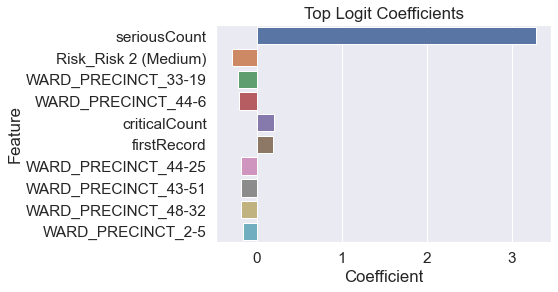

In [97]:
sns.barplot(x="Coefficient", y="Feature", data=best_logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

**Top Support Vector Machine Features**

<AxesSubplot:>

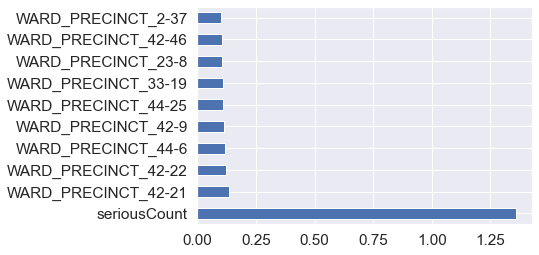

In [98]:
pd.Series(abs(svm_grid.best_estimator_.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

**Top Decision Tree Features**

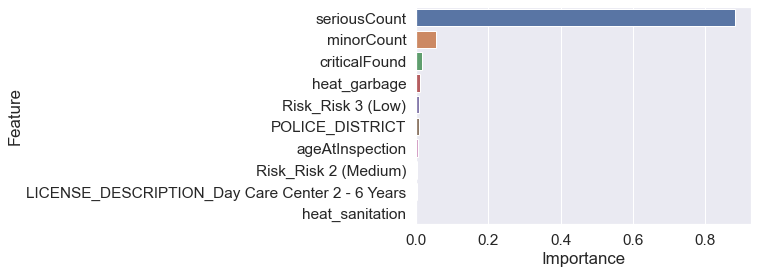

In [99]:
feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dtree_gscv.best_estimator_.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

## 4.2 Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predictive Auditing

We used our best decision tree model to predict the top 1,000 facilities/venues that have the highest probability of failing the sanitation assessment to audit. 

In [100]:
risk_prob = pd.DataFrame(
    {'id':[i for i in range(X.shape[0])],
     'probability': [i[1] for i in dtree_gscv.predict_proba(X)] 
    }
)

risk_prob = risk_prob.sort_values('probability',ascending=False)

riskisest_1000=risk_prob.iloc[0:1000]
print(riskisest_1000)

          id  probability
7023    7023     0.972973
12791  12791     0.972973
2076    2076     0.972973
2077    2077     0.972973
12790  12790     0.972973
...      ...          ...
11137  11137     0.972973
2303    2303     0.972973
11156  11156     0.972973
614      614     0.972973
14864  14864     0.972973

[1000 rows x 2 columns]


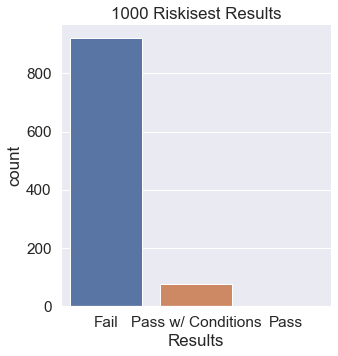

In [101]:
sns.catplot(data = chicago_inspections_2011_to_2013.iloc[riskisest_1000.id],
           x = "Results",
           kind = "count")

plt.title("1000 Riskisest Results")
plt.show()

Our decision tree model correctly predicting more than 90% of facilities that had in fact failed the inspection. Of the facilities that were incorrectly predicted, in reality they passed with conditions rather than complete pass.

### Random Auditing

Then we randomly audited 1,000 facilities, which did much worse compared to the predictive auditing. 

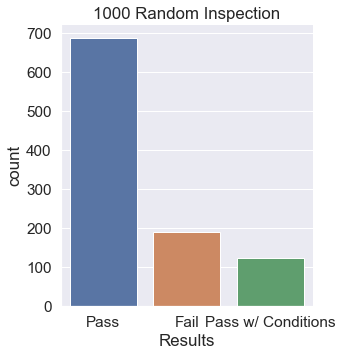

In [102]:
# random audits 

random_1000=np.random.choice(X.shape[0], 1000)
sns.catplot(data = chicago_inspections_2011_to_2013.iloc[random_1000],
           x = "Results",
           kind = "count")

plt.title("1000 Random Inspection")
plt.show()

### 4.3 Predict on Data with Unseen Labels

First, we did the same data cleaning and setup that we did with the original dataset.

In [104]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

# Convert the Inspection Date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'], infer_datetime_format=True)  


chicago_inspections_2014['Inspection_MonthYear'] = chicago_inspections_2014['Inspection_Date'].dt.to_period('M')


# Drop datetime info
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [121]:
chicago_inspections_2014.shape

(3937, 38)

Here we did a bit of extra cleanup -- since the values are a bit different from the original data, we end up with a different number of dummie variables. So this code adds in the extra dummies as needed from the original dataframe that we created, so that we have the same number of features as the model we did the training on. 

In [119]:
%%capture output

# All other features in X
X_new = pd.DataFrame(chicago_inspections_2014)
X_new = pd.get_dummies(X_new)

# Get missing columns in the original data
missing_cols = set(X.columns) - set(X_new.columns)
# Add a missing column in new set with default value equal to 0
for c in missing_cols:
    X_new[c] = 0
    
# Ensure the order of column in the test set is in the same order than in train set
X_new = X_new[X.columns]

In [120]:
X_new.shape

(3937, 2042)

In [113]:
X_new.head()
X.columns.difference(X_new.columns)

Index([], dtype='object')

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_new)
X_new_s = scaler.transform(X_new)

In [115]:
X_new_s.shape

(3937, 2042)

In [116]:
best_dtree_pred_new = dtree_gscv.best_estimator_.predict(X_new_s)

In [118]:
pd.DataFrame(best_dtree_pred_new).to_csv('prediction.csv')    

## 5. Discussion Questions

#### 5.1 Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

Accuracy is expressed as a ratio of correct observations relative to incorrect observations. However, on its own, accuracy does not provide insight on whether a model performed well in terms of predictions for different categories (i.e. true positives, false positives, true negatives, false negatives). A researcher might prioritize one category (i.e. true positives) over another (i.e. false positives) depending on the study context, outcome of interest, and potential policy implications. Using the example of facility inspections for sanitation, a policymaker concerned with protecting public health might prioritize a higher recall value (of all the true positive class members, the percent that were successfully predicted as positive) over other metrics. Conversely, if the cost of a false positive is higher than the cost of a false negative, a policymaker might prioritize a higher precision value (of all predictions in the positive class, the percent that were correct).

Moreover, target datasets used in social science research are sometimes not well balanced, and the policy goal is often to predict rare events (i.e. death) or occurrences (i.e. fraud). In these cases, focusing on accuracy as a metric can be misleading if the algorithm always makes predictions based on the majority without ever predicting the outcome of interest.

#### 5.2 Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

An algorithm can become less effective at making accurate predictions over time if the behaviors or outcomes it is trying to predict adapt (either consciously or unconsciously) in response to the algorithm. For example, if the algorithm tends to identify facilities with a large number of employees as warranting an audit, certain facilities might intentionally alter their hiring practices to avoid detection. Moreover, in the real world, a change in external circumstances or conditions can also impact the algorithm’s predictive performance. For example, in this case of our analysis, a policy might be introduced that modifies the behavior of facility employees, or an unforeseen pandemic like Covid-19 might occur that results in the closure of certain facilities. 

If an algorithm starts to underperform, the researcher could manually attempt to re-tune the model’s hyperparameters using more recent data. In using this approach, the researcher can also gain important insights into changes in the data; for example, the importance of certain features might increase or decrease over time.  

Rather than re-training the model at discrete timepoints using new data, policymakers and researchers might also consider updating the algorithm on a consistent basis to ward off underperformance. However, this approach relies on having access to a steady stream of new data, which is often not the case. 
